<a href="https://colab.research.google.com/github/Manojgharge07/DataScience_Mentorship-Python_Projects/blob/main/Capston_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title- Customer Analysis: Predicting Potential Customers Who Can Buy Our Service.** 

## **Problem Description**

We have large number of customers. Our sales team would like to call potential customers who  can by our service. We don't  have to enough manpower & time to call & reach every customer & convinence them for our products. Also we need to rank customer so that we could offer them our product & services with discounted price.

## **You are given the following information:**

-InvoiceNo

-StockCode

-Description

-Quantity

-InvoiceDate

-UnitPrice

-CustomerID

-Country


## **Work Flow:**

-Customer Segmentation.

-Potential Vs Non-potential.

-Who Can Buy Our Services In Current Month? (Predicted Sales For 30, 60, 90 days)

-Customer Lifetime Values(CLTV). Live Vs Dead Customers

-Cohort Analysis.

-Lifetime Package. (Recency, Frequency, Monetory, Analysis)

# **1. Invite Some Libraries:**

In [32]:
#import pandas and numpy module:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style 
from numpy import *
import datetime as dt

In [39]:
#Making DataFrame:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/All CSV files/Copy of Online Retail.xlsx')

# **Review Our Dataset**

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [41]:
#There are null values in CustomerID column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [42]:
df.shape

(541909, 8)

In [46]:
# There are 4372 unique locations from where the CustomerID.
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [48]:
#Dealing with negative values in Quantity
df['Quantity'] = df['Quantity'].abs()

df.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
270954,560601.0,22138.0,BAKING SET 9 PIECE RETROSPOT,1.0,2011-07-19 17:17:00,4.95,16764.0,United Kingdom,4.95
148468,549240.0,48138.0,DOORMAT UNION FLAG,1.0,2011-04-07 11:37:00,7.95,15910.0,United Kingdom,7.95
148469,549240.0,23154.0,SET OF 4 JAM JAR MAGNETS,1.0,2011-04-07 11:37:00,2.08,15910.0,United Kingdom,2.08
148470,549240.0,23156.0,SET OF 5 MINI GROCERY MAGNETS,1.0,2011-04-07 11:37:00,2.08,15910.0,United Kingdom,2.08
148472,549240.0,21199.0,PINK HEART CONFETTI IN TUBE,1.0,2011-04-07 11:37:00,1.65,15910.0,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...
502122,578841.0,84826.0,ASSTD DESIGN 3D PAPER STICKERS,12540.0,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.00
61624,C541433,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60
61619,541431.0,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
540422,C581484,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60


In [47]:
#There is null values in CustomerID
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
622,536414.0,22139.0,NaN,56.0,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00
1443,536544.0,21773.0,DECORATIVE ROSE BATHROOM BOTTLE,1.0,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544.0,21774.0,DECORATIVE CATS BATHROOM BOTTLE,2.0,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544.0,21786.0,POLKADOT RAIN HAT,4.0,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544.0,21787.0,RAIN PONCHO RETROSPOT,2.0,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
...,...,...,...,...,...,...,...,...,...
541536,581498.0,85099B,JUMBO BAG RED RETROSPOT,5.0,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
541537,581498.0,85099C,JUMBO BAG BAROQUE BLACK WHITE,4.0,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
541538,581498.0,85150.0,LADIES & GENTLEMEN METAL SIGN,1.0,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
541539,581498.0,85174.0,S/4 CACTI CANDLES,1.0,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


# **Heat map for missing values**

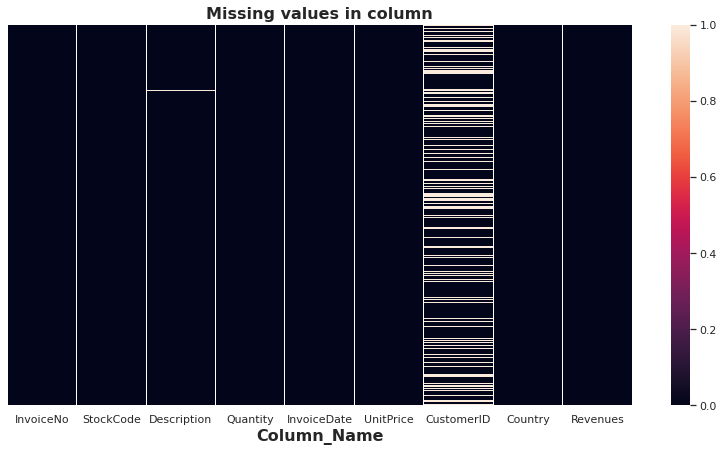

In [49]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=16, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=16)
plt.show()

In [50]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

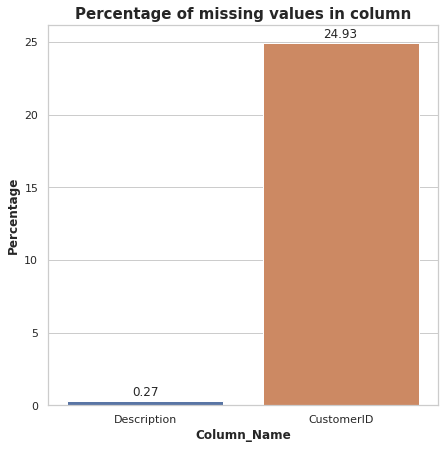

In [51]:
plt.figure(figsize=(7, 7))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=12, weight="bold")
plt.ylabel("Percentage", size=12, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=15)
plt.show()

There is 24.93% of missing values in CustomerID column, so we are drop this.

In [52]:
df1=df.dropna(subset=['CustomerID'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587.0,22899.0,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587.0,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587.0,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [53]:
df1.describe()

,Quantity,UnitPrice,CustomerID,Revenues
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570,20.401854
std,248.624170,69.315162,1713.600303,427.591718
min,1.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
df1[df1['Quantity'] <=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# **Count, Unique Values and Frequency of Veriables.**

In [54]:
# restrict to transactions with positive quantities
df1 = df1[df1["Quantity"] > 0]

# datetime to date format
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"]).dt.date #normalize()
#df1.set_index("InvoiceDate", inplace=False)

# treat CustomerID as a categorical variable
df1["CustomerID"] = df1["CustomerID"].astype(np.int64).astype(object)

# review the categorical variables
df1.describe(include='object').T

,count,unique,top,freq
InvoiceNo,406829.0,22190.0,576339.0,542.0
StockCode,406829,3684,85123A,2077
Description,406829,3896,WHITE HANGING HEART T-LIGHT HOLDER,2070
InvoiceDate,406829,305,2011-11-06,3434
CustomerID,406829,4372,17841,7983
Country,406829,37,United Kingdom,361878


# **Unique values in each column:**

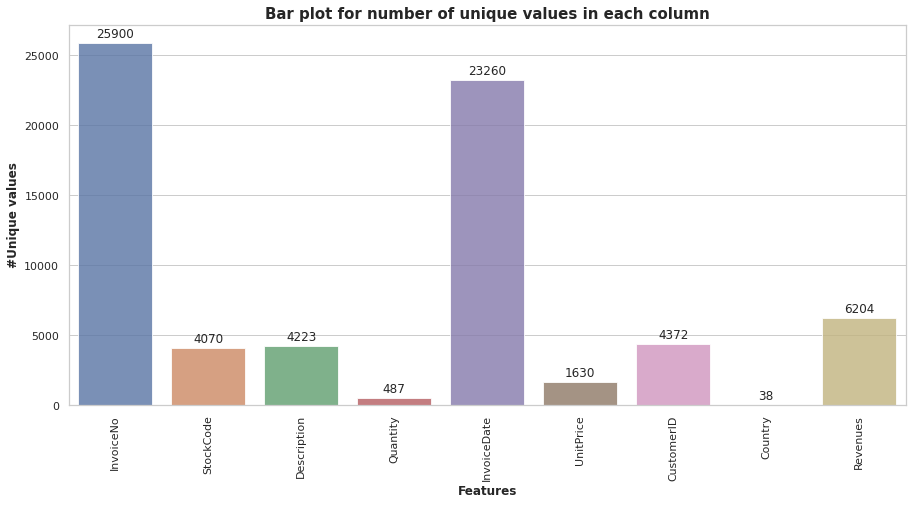

In [55]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# **Add new column of Revenues:**  Total Purchase Amount

In [ ]:
#It is defined as total purchase amount:
# revenues = quantity * unitprice
df1["Revenues"] = df1["Quantity"] * df1["UnitPrice"]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09,0.85,12680,France,10.20
541905,581587.0,22899.0,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09,2.10,12680,France,12.60
541906,581587.0,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09,4.15,12680,France,16.60
541907,581587.0,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09,4.15,12680,France,16.60


# **'0.00' Unitprice replaced with '0.1'**

In [ ]:
Unit = df1['UnitPrice']
Unit.replace(to_replace = 0.00, value =0.1, inplace=True)

# **Arrenge the 'Quantity' in Desending order.**

In [ ]:
df1.sort_values("Quantity" , axis = 0, ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenues
540421,581483.0,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09,2.08,16446,United Kingdom,168469.60
540422,C581484,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09,2.08,16446,United Kingdom,168469.60
61619,541431.0,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18,1.04,12346,United Kingdom,77183.60
61624,C541433,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18,1.04,12346,United Kingdom,77183.60
502122,578841.0,84826.0,ASSTD DESIGN 3D PAPER STICKERS,12540.0,2011-11-25,0.10,13256,United Kingdom,0.00
...,...,...,...,...,...,...,...,...,...
233061,557426.0,21625.0,VINTAGE UNION JACK APRON,1.0,2011-06-20,6.95,15016,United Kingdom,6.95
233060,557426.0,21364.0,PEACE SMALL WOOD LETTERS,1.0,2011-06-20,6.75,15016,United Kingdom,6.75
456017,575661.0,22573.0,STAR WOODEN CHRISTMAS DECORATION,1.0,2011-11-10,0.85,12617,France,0.85
456016,575661.0,23333.0,IVORY WICKER HEART MEDIUM,1.0,2011-11-10,1.25,12617,France,1.25


In [ ]:
df1.describe()

,Quantity,UnitPrice,Revenues
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460481,23.407255
std,248.624170,69.315161,427.437730
min,1.000000,0.001000,0.000000
25%,2.000000,1.250000,4.680000
50%,5.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


# **Total count of repeted customers in referance of CustomerID and getting top 10 entries.**

In [ ]:
repeted_customer= df1.CustomerID.value_counts()

In [ ]:
repeted_customer.value_counts()

1       79
6       78
10      74
7       72
12      72
        ..
389      1
391      1
395      1
400      1
7983     1
Name: CustomerID, Length: 474, dtype: int64

In [ ]:
# getting top 10 customers:
repeted_customer.head(10)

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
15311    2491
14646    2085
13089    1857
13263    1677
14298    1640
Name: CustomerID, dtype: int64

# **Grouping By with CustomerID and describe it.**

In [56]:
grp_by= df1.groupby(['CustomerID'])['Revenues'].aggregate('count').reset_index().sort_values('Revenues', ascending=False)

In [57]:
display(grp_by)

,CustomerID,Revenues
4042,17841,7983
1895,14911,5903
1300,14096,5128
330,12748,4642
1674,14606,2782
...,...,...
1318,14119,1
1046,13747,1
2400,15590,1
2379,15562,1


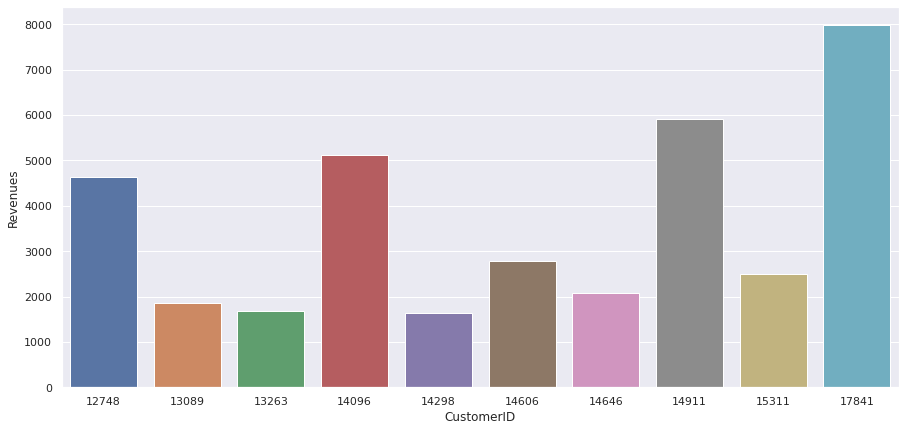

In [59]:
import seaborn as sns
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize= (15,7))
sns.barplot(x='CustomerID', y='Revenues', data= grp_by.head(10), ax=ax)

# **Group By entries arrenge by Descending order with sorting of Revenue.**

In [60]:
grp_by= df1.groupby(['CustomerID']).sum().sort_values('Revenues', ascending=False).head(10)
print(grp_by)

            Quantity  UnitPrice   Revenues
CustomerID                                
14646       198263.0    5400.21  279489.02
18102        64126.0    5159.73  256438.49
17450        70957.0    3320.09  187482.17
14911        83850.0   31060.66  132572.62
12415        78098.0    2499.82  123725.45
14156        58745.0    6544.29  113384.14
17511        66086.0    2607.08   88125.38
16684        51120.0     709.93   65892.08
13694        64821.0    1163.81   62653.10
15311        38668.0    6267.75   59419.34


# **Bar ploting of Quantity Vs Revenues:**

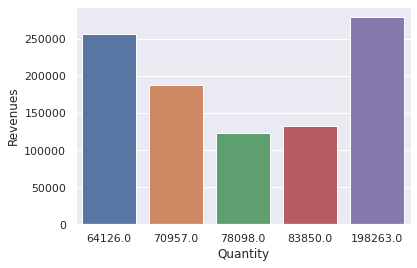

In [61]:
import seaborn as sns
sns.barplot(x = 'Quantity', y = 'Revenues' , data = grp_by.head(5))